In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 128
BATCH_SIZE = 16
EPOCHS = 10

In [5]:

import tensorflow as tf
dataset_path = r"C:\Users\gowri\OneDrive\Desktop\plant vilage\PlantVillage"

selected_classes = [
                    'Tomato__Target_Spot',
                    'Tomato__Tomato_mosaic_virus',
                    'Tomato__Tomato_YellowLeaf__Curl_Virus',
                    'Tomato_Bacterial_spot',
                    'Tomato_Early_blight',
                    'Tomato_healthy',
                    'Tomato_Late_blight',
                    'Tomato_Leaf_Mold',
                    'Tomato_Septoria_leaf_spot',
                    'Tomato_Spider_mites_Two_spotted_spider_mite']
# Load only specified classes
dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='int',
    class_names=selected_classes,
    image_size=(256, 256),
    batch_size=BATCH_SIZE  # Use the new lower batch size
)


# Display loaded class names
print("Loaded Classes:", dataset.class_names)

Found 16011 files belonging to 10 classes.
Loaded Classes: ['Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite']


In [7]:
class_name = dataset.class_names
class_name

['Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite']

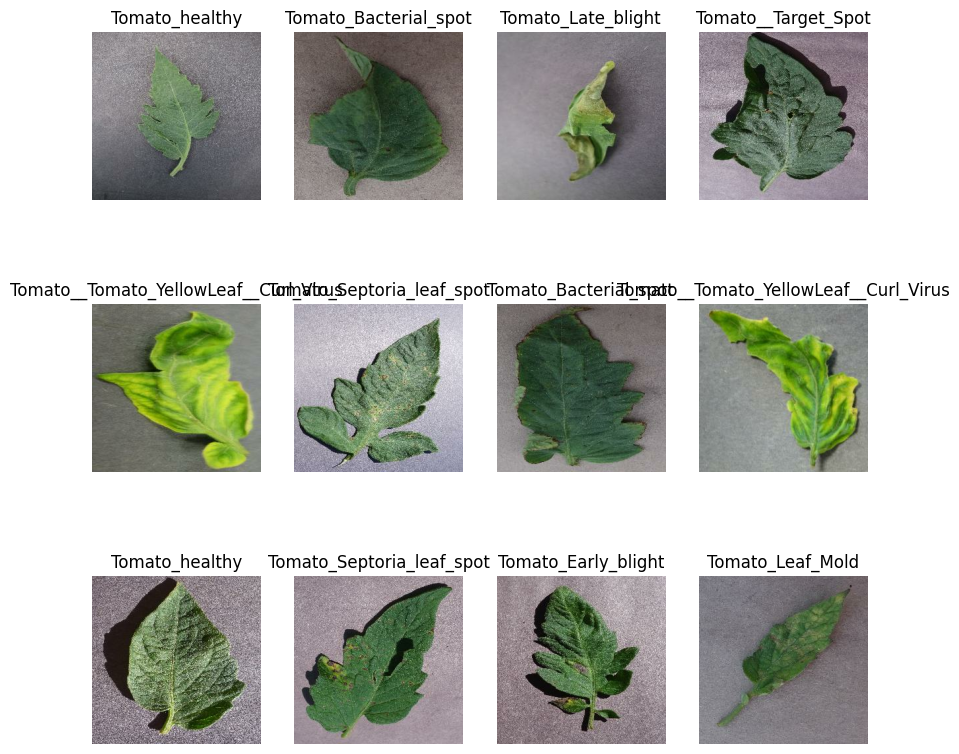

In [9]:
plt.figure(figsize= (10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis('off')

In [11]:
train_size = 0.8
len(dataset)*train_size

800.8000000000001

In [13]:
train_ds = dataset.take(700)
len(train_ds)

700

In [15]:
test_ds = dataset.skip(500)
len(test_ds)

501

In [17]:
val_size = 0.1
len(dataset)*val_size

100.10000000000001

In [19]:
test_ds = test_ds.skip(14)
len(test_ds)

487

In [21]:
def get_dataset_partition_tf(ds, train_split = 0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size =  len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.take(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [23]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [25]:
len(train_ds)

800

In [27]:
len(val_ds)

100

In [29]:
len(test_ds)

101

In [5]:
train_ds = train_ds.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


NameError: name 'train_ds' is not defined

In [33]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])




In [47]:
from tensorflow.keras import layers, models
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model = models.Sequential([
    layers.Rescaling(1.0 / 255, input_shape=(256, 256, 3)),  # Normalize & define input shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.GlobalAveragePooling2D(),  # Efficient downsampling
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # You have 10 classes
])


C:\Users\gowri\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
from keras.optimizers import Adam

# Recompile model with a new optimizer
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # or same params as before
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [51]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    verbose=1
)

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1163s 1s/step - accuracy: 0.3215 - loss: 1.8839 - val_accuracy: 0.6344 - val_loss: 1.1039
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1204s 1s/step - accuracy: 0.6642 - loss: 0.9422 - val_accuracy: 0.7150 - val_loss: 0.8131
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1178s 1s/step - accuracy: 0.7683 - loss: 0.6660 - val_accuracy: 0.8056 - val_loss: 0.5798
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1166s 1s/step - accuracy: 0.8238 - loss: 0.5132 - val_accuracy: 0.8400 - val_loss: 0.4678
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1148s 1s/step - accuracy: 0.8536 - loss: 0.4244 - val_accuracy: 0.8750 - val_loss: 0.3989
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1210s 1s/step - accuracy: 0.8697 - loss: 0.3765 - val_accuracy: 0.8494 - val_loss: 0.4382
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1194s 1s/step - accuracy: 0.8791 - loss: 0.3514 - val_accuracy: 0.8900 - val_loss: 0.3167
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1166s 1s/step - accuracy: 0.8876 - loss: 0.3252 - 

In [53]:
# Save the entire model
model.save("tomato_disease_model.h5")


In [3]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

# Load previously saved model
model = load_model("tomato_disease_model.h5")

# Enable eager execution if not already
tf.config.run_functions_eagerly(True)

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Resume training (epoch 11–20)
history_2 = model.fit(
    train_ds,
    epochs=20,
    initial_epoch=10,
    validation_data=val_ds,
    callbacks=[early_stopping],
    verbose=1
)

# Save the updated model
model.save("tomato_disease_model_v2.h5")


NameError: name 'train_ds' is not defined

In [ ]:
https://github.com/sfme/LLM-TaylorSwift-LyricsGenerator
https://www.kaggle.com/datasets/arjuntejaswi/plant-village